In [10]:
import thicket as th
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import os
import sys
sys.path.append(
    "/scratch/group/csce-435-f25/python-3.10.8/lib/python3.10/site-packages")


pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [33]:
cali_files = glob("cali-files/*.cali")
tk = th.Thicket.from_caliperreader(cali_files)
df = tk.dataframe.reset_index()
df_merged = df.merge(tk.metadata, left_on='profile', right_index=True)
df = df_merged


(2/2) Creating Thicket: 100%|██████████| 559/559 [00:09<00:00, 61.81it/s]


In [34]:
df_sorted = df.sort_values(by=['input_size', 'num_procs', 'data_type', 'input_type'])
df_sorted.head(10)

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls (total),name,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,opts:node.order,opts:output,opts:region.count,opts:time.exclusive,implementation_source,group_num,num_procs,input_type,input_size,size_of_data_type,data_type,programming_model,algorithm,cluster,cmdline,libraries,launchdate
230,"{'name': 'main', 'type': 'function'}",6783242381337,1.0,"(regionprofile,)",0.463419,0.464359,0.463889,0.927779,0.461265,0.461296,0.461280,0.922561,NaN,NaN,NaN,NaN,main,2.13.1,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,cali-files/16-2-0-1.cali,true,true,https://stanford.edu/~rezab/classes/cme323/S16...,8,2,0,65536,4,float,MPI,Merge Sort,c,"[./merge_sort, 16, 0, 1]","[linux-vdso.so.1, /scratch/group/csce-435-f25/...",1761619874
790,"{'name': 'data_init_runtime', 'type': 'function'}",6783242381337,2.0,"(regionprofile,)",0.000149,0.000154,0.000151,0.000302,0.000149,0.000154,0.000151,0.000302,1.0,1.0,1.0,2.0,data_init_runtime,2.13.1,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,cali-files/16-2-0-1.cali,true,true,https://stanford.edu/~rezab/classes/cme323/S16...,8,2,0,65536,4,float,MPI,Merge Sort,c,"[./merge_sort, 16, 0, 1]","[linux-vdso.so.1, /scratch/group/csce-435-f25/...",1761619874
1350,"{'name': 'comp', 'type': 'function'}",6783242381337,3.0,"(regionprofile,)",0.001860,0.002133,0.001997,0.003994,0.000013,0.000019,0.000016,0.000032,1.0,1.0,2.0,3.0,comp,2.13.1,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,cali-files/16-2-0-1.cali,true,true,https://stanford.edu/~rezab/classes/cme323/S16...,8,2,0,65536,4,float,MPI,Merge Sort,c,"[./merge_sort, 16, 0, 1]","[linux-vdso.so.1, /scratch/group/csce-435-f25/...",1761619874
1910,"{'name': 'comp_small', 'type': 'function'}",6783242381337,4.0,"(regionprofile,)",0.001848,0.001850,0.001849,0.003697,0.001848,0.001850,0.001849,0.003697,1.0,1.0,1.0,2.0,comp_small,2.13.1,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,cali-files/16-2-0-1.cali,true,true,https://stanford.edu/~rezab/classes/cme323/S16...,8,2,0,65536,4,float,MPI,Merge Sort,c,"[./merge_sort, 16, 0, 1]","[linux-vdso.so.1, /scratch/group/csce-435-f25/...",1761619874
2470,"{'name': 'comp_large', 'type': 'function'}",6783242381337,7.0,"(regionprofile,)",0.000264,0.000264,0.000264,0.000264,0.000264,0.000264,0.000264,0.000264,1.0,1.0,1.0,1.0,comp_large,2.13.1,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,cali-files/16-2-0-1.cali,true,true,https://stanford.edu/~rezab/classes/cme323/S16...,8,2,0,65536,4,float,MPI,Merge Sort,c,"[./merge_sort, 16, 0, 1]","[linux-vdso.so.1, /scratch/group/csce-435-f25/...",1761619874
3030,"{'name': 'comm', 'type': 'function'}",6783242381337,5.0,"(regionprofile,)",0.000115,0.000509,0.000312,0.000624,0.000006,0.000019,0.000012,0.000025,1.0,1.0,1.0,2.0,comm,2.13.1,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,time.exclusive",regionprofile,spot,true,cali-files/16-2-0-1.cali,true,true,https://stanford.edu/~rezab/classes/cme323/S16...,8,2,0,65536,4,float,MPI,Merge Sort,c,"[./merge_sort, 16, 0, 1]","[linux-vdso.so.1, /scratch/group/csce-435-f25/...",1761619874
3590,"{'name': 'comm_large', 'type': 'function'}",6783242381337,6.0,"(regionprofile,)",0.000109,0.000490,0.000299,0.000599,0.000109,0.000490,0.000299,0.000599,1.0,1.0,1.0,2.0,comm_large,2.13.1,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"node.order,region.count,

In [35]:
print(df['name'].unique())

['main' 'data_init_runtime' 'comp' 'comp_small' 'comp_large' 'comm'
 'comm_large' 'correctness_check']


In [36]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2025.1.0

2.139 main
├─ 0.053 data_init_runtime
├─ 0.262 comp
│  ├─ 0.197 comp_small
│  └─ 0.129 comp_large
├─ 0.091 comm
│  └─ 0.091 comm_large
└─ 0.048 correctness_check

Legend (Metric: Avg time/rank Min: 0.05 Max: 2.14 indices: {'profile': np.int64(312997649)})
█ 1.93 - 2.14
█ 1.51 - 1.93
█ 1.09 - 1.51
█ 0.68 - 1.09
█ 0.26 - 0.68
█ 0.05 - 0.26

name User code    ◀  Only in left graph    ▶  Only in right graph



- Experiment 1: 2 nodes, 64 processes, vary number of elements
- Experiment 2 (strong scaling): 2^22 elements, vary number of processes 
- Experiment 3 (weak scaling): (2^16 elements, 16 processors), (2^18 elements, 32 processors), (2^20 elements, 64 processors), (2^22 elements, 128 processors), (2^24 elements, 256 processors), (2^26 elements, 512 processors), (2^28 elements, 1024 processors)
- Experiment 4 (vary data types): 2^22 elements, 64 processes, double/int 
- Experiment 5 (vary initial sort level): 2^22 elements, 64 processes, (sorted/perturbed/random/reversed)
- Assume initial random sort level

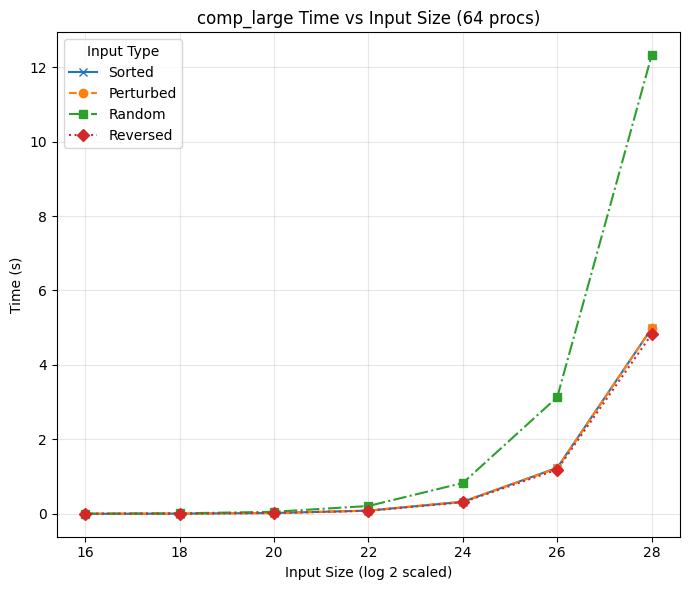

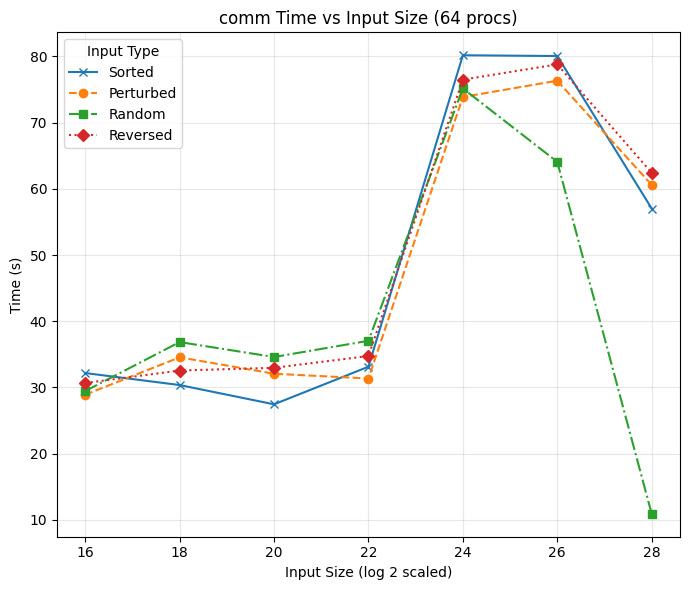

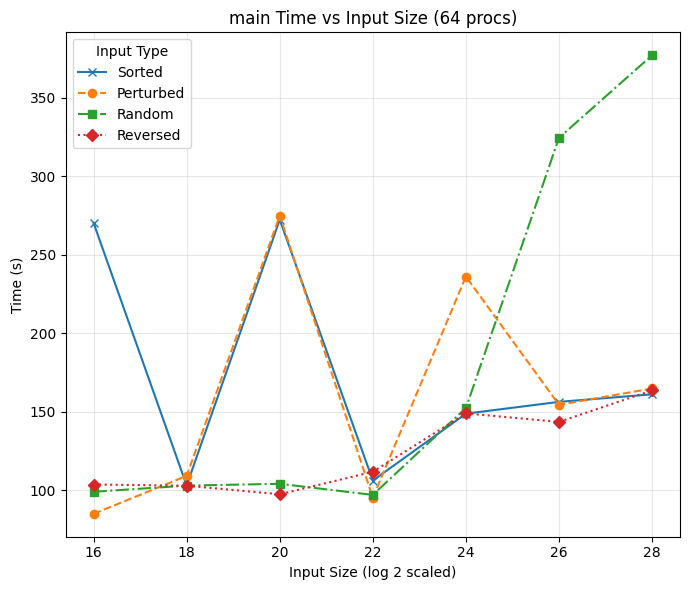

In [37]:
# === Merge Sort Caliper Analysis with Thicket ===

# Load Caliper files and Thicket
df = df_sorted
input_type_map = {0: 'Sorted', 1: 'Perturbed', 2: 'Random', 3: 'Reversed'}
regions = ['comp_large', 'comm', 'main']
input_sizes = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
input_types = [0, 1, 2, 3]
num_procs_list = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
time_col = 'Total time' if 'Total time' in df.columns else 'time'

# --- Plot Style ---
os.makedirs('plots', exist_ok=True)
plt.style.use('default')
color_list = None # Use default matplotlib colors
marker_list = ['x', 'o', 's', 'D']
line_styles = ['-', '--', '-.', ':']

# --- Experiment 1: 2 nodes, 64 processes, vary number of elements ---
fixed_procs = 64
for region in regions:
    fig, ax = plt.subplots(figsize=(7, 6))
    for idx, input_type in enumerate(input_types):
        times, sizes = [], []
        for input_size in input_sizes:
            mask = (df['name'] == region) & \
                   (df['input_size'] == input_size) & \
                   (df['num_procs'] == fixed_procs) & \
                   (df['input_type'] == input_type)
            data = df[mask]
            if len(data) > 0:
                times.append(data[time_col].iloc[0])
                sizes.append(input_size)
        if len(times) > 0:
            ax.plot([np.log2(s) for s in sizes], times,
                    marker=marker_list[idx], linestyle=line_styles[idx],
                    label=input_type_map[input_type])
    ax.set_xlabel('Input Size (log 2 scaled)')
    ax.set_ylabel('Time (s)')
    ax.set_title(f'{region} Time vs Input Size (64 procs)')
    ax.grid(True, alpha=0.3)
    ax.legend(title='Input Type', loc='best')
    plt.tight_layout()
    plt.savefig(f'plots/exp1_{region}_64procs.png', dpi=150, bbox_inches='tight')
    plt.show()





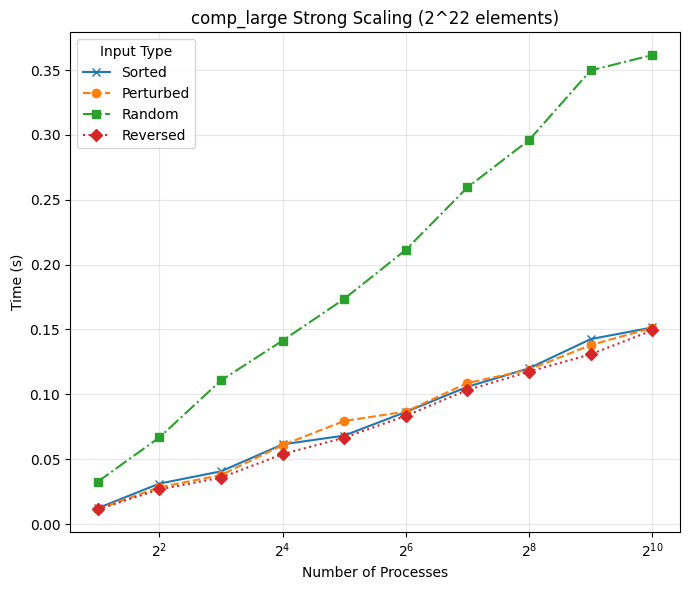

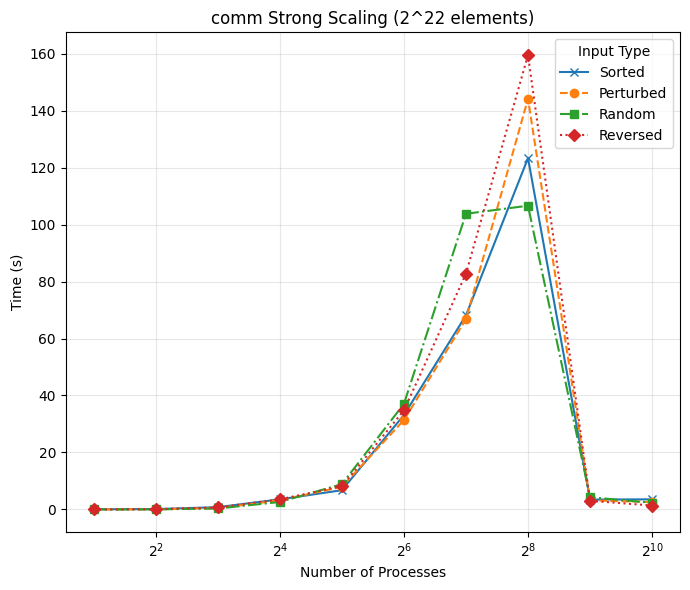

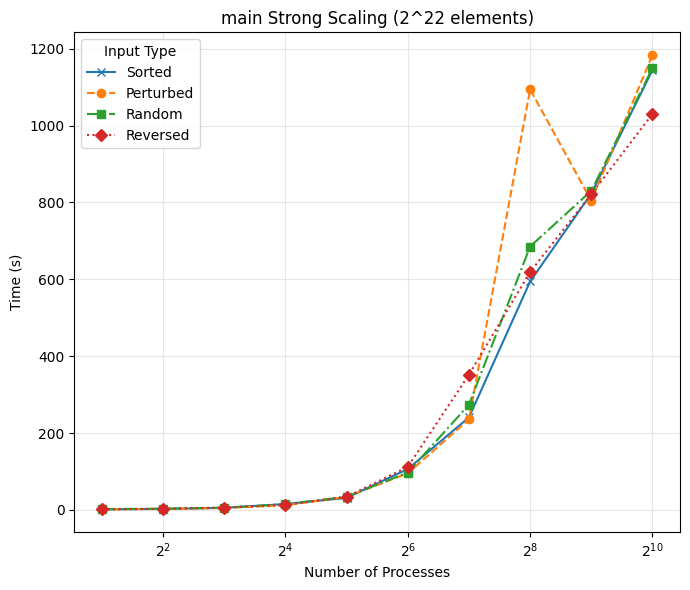

In [38]:
# --- Experiment 2: Strong scaling (2^22 elements, vary number of processes) ---
fixed_size = 2**22
for region in regions:
    fig, ax = plt.subplots(figsize=(7, 6))
    for idx, input_type in enumerate(input_types):
        times, procs = [], []
        for num_proc in num_procs_list:
            mask = (df['name'] == region) & \
                   (df['input_size'] == fixed_size) & \
                   (df['num_procs'] == num_proc) & \
                   (df['input_type'] == input_type)
            data = df[mask]
            if len(data) > 0:
                times.append(data[time_col].iloc[0])
                procs.append(num_proc)
        if len(times) > 0:
            ax.plot(procs, times,
                    marker=marker_list[idx], linestyle=line_styles[idx],
                    label=input_type_map[input_type])
    ax.set_xlabel('Number of Processes')
    ax.set_ylabel('Time (s)')
    ax.set_title(f'{region} Strong Scaling (2^22 elements)')
    ax.set_xscale('log', base=2)
    ax.grid(True, alpha=0.3)
    ax.legend(title='Input Type', loc='best')
    plt.tight_layout()
    plt.savefig(f'plots/exp2_{region}_strong_scaling.png',
                dpi=150, bbox_inches='tight')
    plt.show()

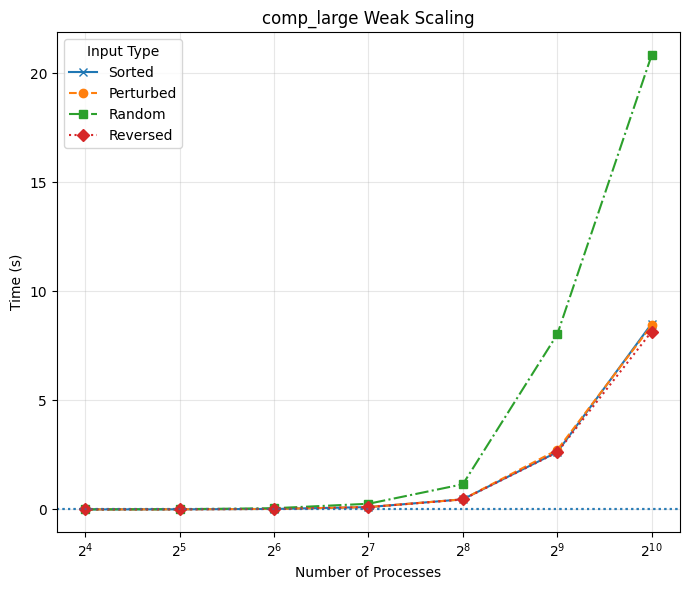

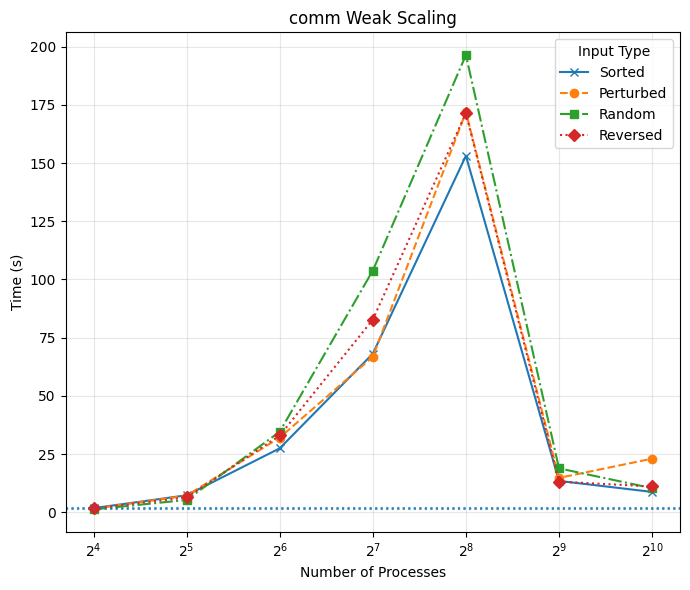

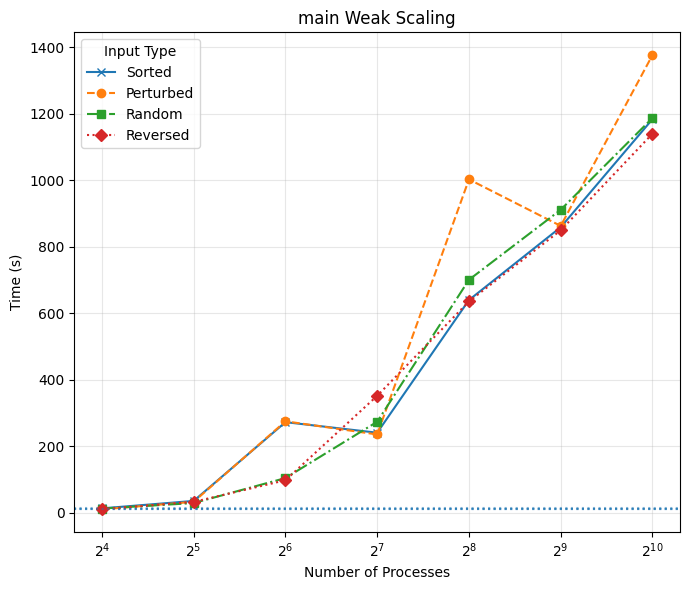

In [39]:
# --- Experiment 3: Weak scaling ---
weak_scaling_configs = [
    (2**16, 16), (2**18, 32), (2**20, 64),
    (2**22, 128), (2**24, 256), (2**26, 512), (2**28, 1024)
]
for region in regions:
    fig, ax = plt.subplots(figsize=(7, 6))
    for idx, input_type in enumerate(input_types):
        times, procs = [], []
        for input_size, num_proc in weak_scaling_configs:
            mask = (df['name'] == region) & \
                   (df['input_size'] == input_size) & \
                   (df['num_procs'] == num_proc) & \
                   (df['input_type'] == input_type)
            data = df[mask]
            if len(data) > 0:
                times.append(data[time_col].iloc[0])
                procs.append(num_proc)
        if len(times) > 0:
            ax.plot(procs, times,
                    marker=marker_list[idx], linestyle=line_styles[idx],
                    label=input_type_map[input_type])
            ax.axhline(y=times[0], linestyle=':', alpha=0.5)
    ax.set_xlabel('Number of Processes')
    ax.set_ylabel('Time (s)')
    ax.set_title(f'{region} Weak Scaling')
    ax.set_xscale('log', base=2)
    ax.grid(True, alpha=0.3)
    ax.legend(title='Input Type', loc='best')
    plt.tight_layout()
    plt.savefig(f'plots/exp3_{region}_weak_scaling.png',
                dpi=150, bbox_inches='tight')
    plt.show()

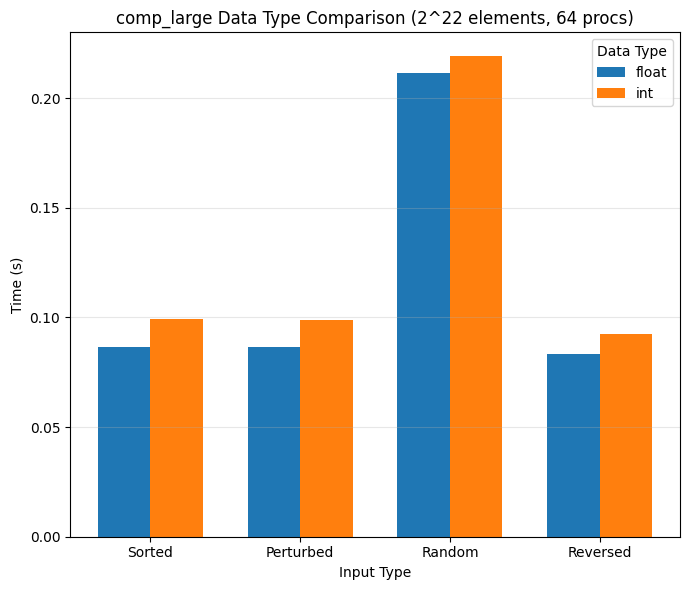

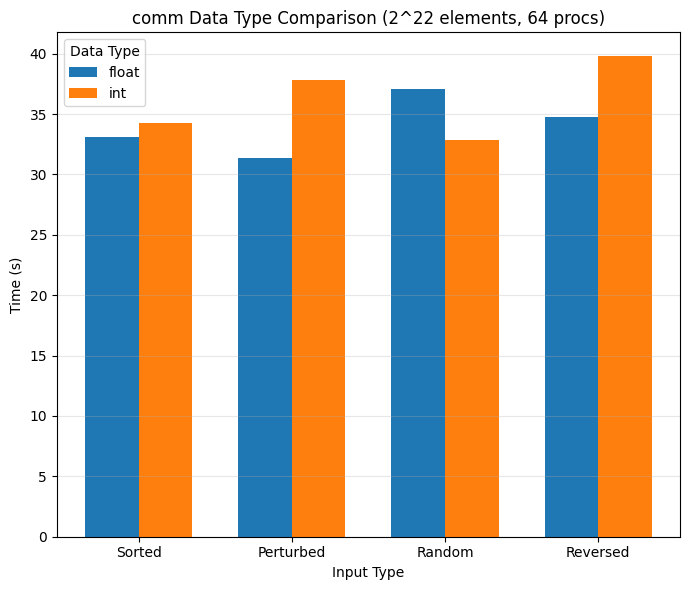

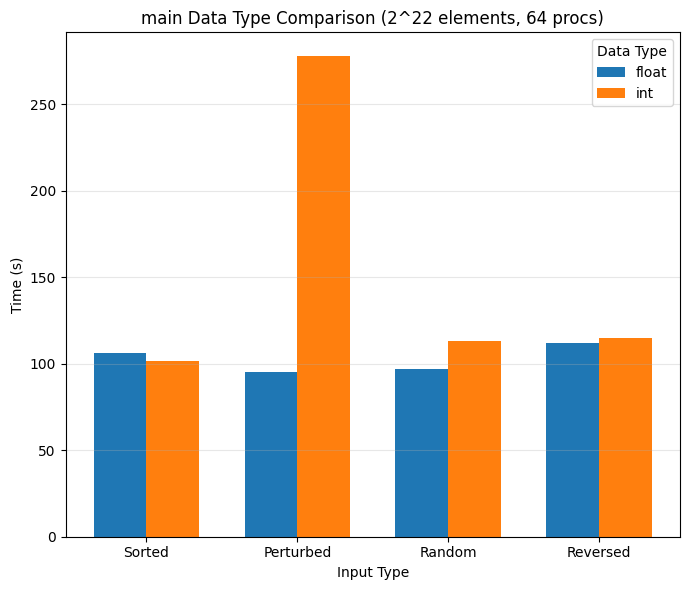

In [40]:
# --- Experiment 4: Data type comparison (int vs float) ---
if 'data_type' in df.columns:
    for region in regions:
        fig, ax = plt.subplots(figsize=(7, 6))
        width = 0.35
        for idx, data_type in enumerate(df['data_type'].unique()):
            times, types = [], []
            for input_type in input_types:
                mask = (df['name'] == region) & \
                       (df['input_size'] == fixed_size) & \
                       (df['num_procs'] == fixed_procs) & \
                       (df['input_type'] == input_type) & \
                       (df['data_type'] == data_type)
                data = df[mask]
                if len(data) > 0:
                    times.append(data[time_col].iloc[0])
                    types.append(input_type_map[input_type])
            if len(times) > 0:
                x_pos = np.arange(len(types)) + idx * width
                ax.bar(x_pos, times, width=width, label=data_type)
        ax.set_xlabel('Input Type')
        ax.set_ylabel('Time (s)')
        ax.set_title(f'{region} Data Type Comparison (2^22 elements, 64 procs)')
        ax.set_xticks(np.arange(len(input_types)) + width/2)
        ax.set_xticklabels([input_type_map[t] for t in input_types])
        ax.legend(title='Data Type', loc='best')
        ax.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.savefig(f'plots/exp4_{region}_datatype.png', dpi=150, bbox_inches='tight')
        plt.show()
else:
    print("Warning: 'data_type' column not found. Run experiments with both int and float.")



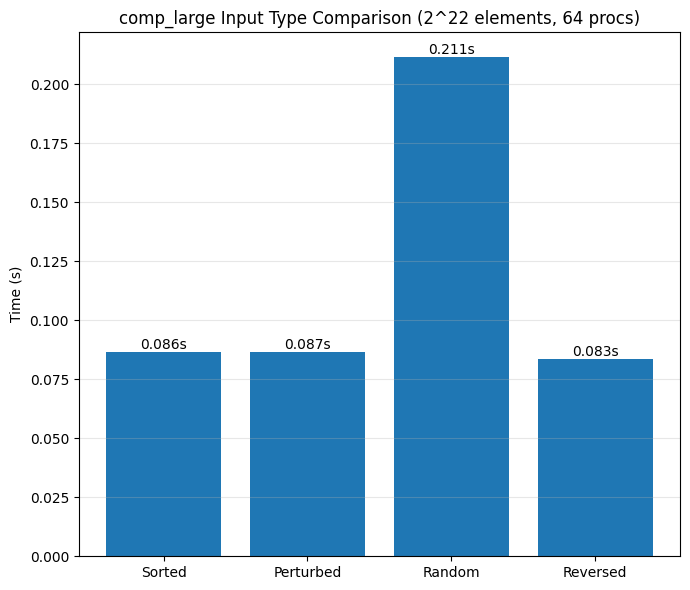

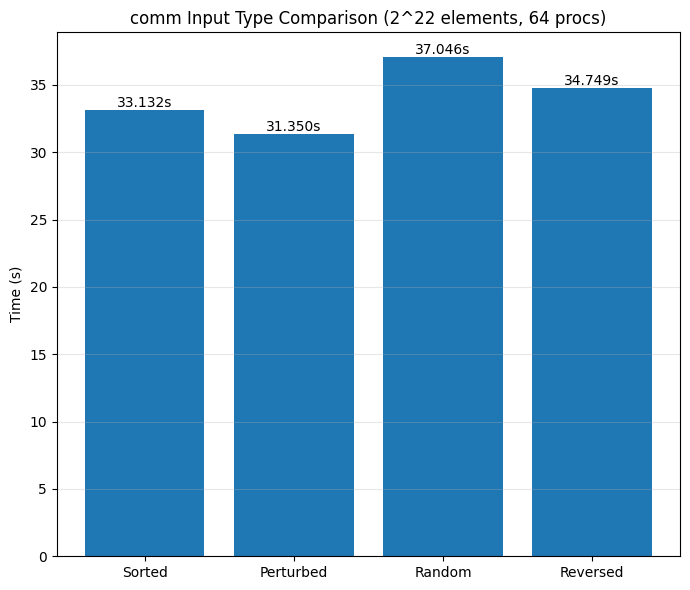

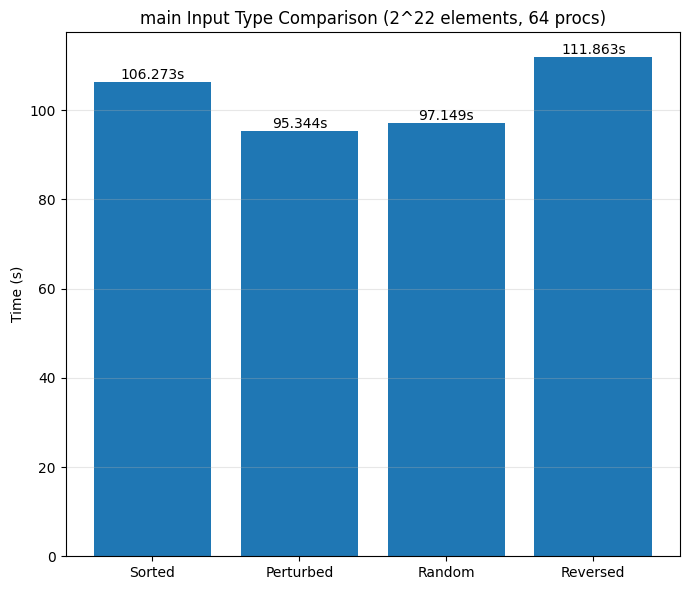

In [41]:
# --- Experiment 5: Input type comparison (2^22 elements, 64 processes) ---
for region in regions:
    fig, ax = plt.subplots(figsize=(7, 6))
    times, labels = [], []
    for idx, input_type in enumerate(input_types):
        mask = (df['name'] == region) & \
               (df['input_size'] == fixed_size) & \
               (df['num_procs'] == fixed_procs) & \
               (df['input_type'] == input_type)
        data = df[mask]
        if len(data) > 0:
            times.append(data[time_col].iloc[0])
            labels.append(input_type_map[input_type])
    if len(times) > 0:
        bars = ax.bar(labels, times)
        ax.set_ylabel('Time (s)')
        ax.set_title(f'{region} Input Type Comparison (2^22 elements, 64 procs)')
        ax.grid(True, alpha=0.3, axis='y')
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}s', ha='center', va='bottom')
        plt.tight_layout()
        plt.savefig(f'plots/exp5_{region}_inputtype.png', dpi=150, bbox_inches='tight')
        plt.show()